<a href="https://colab.research.google.com/github/SerbC/TacaiTaid/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Image path /content/drive/MyDrive/fac/Laborator/Images

import cv2
import glob as gl
import random

In [61]:
# get image paths

base_path = "/content/drive/MyDrive/fac/Laborator/Images"
images = []
for i in range(4):
  images.append(gl.glob(base_path+'/'+str(i)+'/*.jpg'))
print(images)

[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/7.jpg', '/cont

In [62]:
random.seed(42)
randomlist = random.sample(range(0, 9), 7)

train_images = []
test_images = []

for idx in range(4):
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i in randomlist:
      tmp_train.append(images[idx][i])
    else: 
      tmp_test.append(images[idx][i])
  train_images.append(tmp_train)
  test_images.append(tmp_test)

print(randomlist)
print(train_images)
print(test_images)

[1, 0, 5, 2, 8, 4, 7]
[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/8.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/2/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/2.jpg', '/content/drive/MyDrive/fac/Laborator

In [63]:
tr_im = []
ts_im = []
for i in range(len(train_images)):
  tmp = []
  for j in range(len(train_images[0])):
    im = cv2.imread(train_images[i][j])
    tmp.append(im)
  tr_im.append(tmp)

In [64]:
# OPENCV BUG
# cv2.imshow("Name", tr_im[0][0])

In [65]:
import matplotlib.pyplot as plt

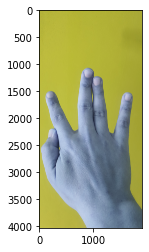

In [66]:
plt.imshow(tr_im[0][0])
# OpenCV citeste imaginile BGR

In [67]:
# convert images to RGB
for i in range(len(tr_im)):
  for j in range(len(tr_im[0])):
    tr_im[i][j] = cv2.cvtColor( tr_im[i][j], cv2.COLOR_BGR2RGB)

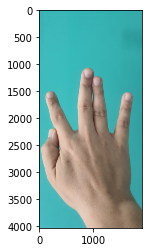

In [68]:
plt.imshow(tr_im[0][0])
# OpenCV citeste imaginile BGR

In [69]:
# resize
scale_percent = 0.15
width = int(tr_im[0][0].shape[1] * scale_percent )
height = int(tr_im[0][0].shape[0] * scale_percent)
dim = (width, height)

for i in range(len(tr_im)):
  for j in range(len(tr_im[0])):
    tr_im[i][j] = cv2.resize( tr_im[i][j], dim)

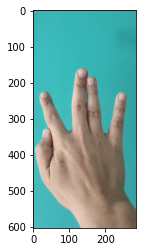

In [70]:
plt.imshow(tr_im[0][0])
# OpenCV citeste imaginile BGR

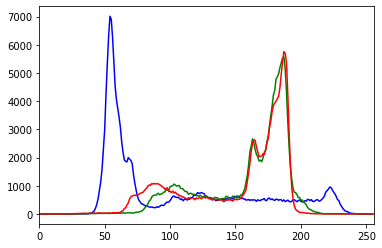

In [71]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([tr_im[0][0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

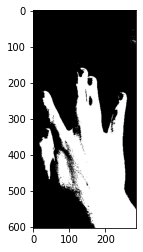

In [72]:
tst_tmp = tr_im[0][0][:,:,2].copy()
tst_tmp[tst_tmp > 150] = 0
tst_tmp[tst_tmp > 0] = 255
plt.imshow(tst_tmp,cmap='gray')



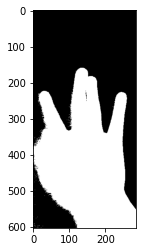

In [73]:
#  46 163 157
tst_tmp = tr_im[0][0].copy()
width = int(tst_tmp.shape[1] )
height = int(tst_tmp.shape[0] )
for i in range(height):
  for j in range(width):
    if tst_tmp[i][j][0] in range(16, 77) and tst_tmp[i][j][1] in range(123, 204) and tst_tmp[i][j][2] in range(111, 205):
      tst_tmp[i,j,:] = [0,0,0]
    else:
      tst_tmp[i,j,:] = [255,255,255]
plt.imshow(tst_tmp,cmap='gray')


